
# **Importing Necessary Libraries and Dataset**


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# **Splitting MNIST Dataset into Training and Testing Dataset**

In [2]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the dataset
X = X_train.astype('float32') / 255.0
X = X.reshape(-1, 28, 28, 1)  # Add the channel dimension (28x28x1)

y = y_train

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (42000, 28, 28, 1)
Testing data shape: (18000, 28, 28, 1)


# **Simple LeNet Model**

In [3]:
def build_lenet():
    model = models.Sequential([
        layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28, 28, 1)),
        layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
        layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh'),
        layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
        layers.Flatten(),
        layers.Dense(120, activation='tanh'),
        layers.Dense(84, activation='tanh'),
        layers.Dense(10, activation='softmax')  # Output for 10 classes
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model



# **Simple AlexNet Model**

In [4]:
def build_alexnet():
    model = models.Sequential([
        layers.Conv2D(96, (3, 3), strides=1, activation='relu', input_shape=(28, 28, 1), padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        layers.Flatten(),
        layers.Dense(1024, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')  # Output for 10 classes
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


# **Training the Model(s)**

In [5]:
# Build the models
lenet = build_lenet()


print("Training LeNet model...")
lenet_history = lenet.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

lenet_score = lenet.evaluate(X_test, y_test)
print(f"LeNet Test Accuracy: {lenet_score[1]*100:.2f}%")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training LeNet model...
Epoch 1/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8241 - loss: 0.6265 - val_accuracy: 0.9429 - val_loss: 0.1920
Epoch 2/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9514 - loss: 0.1625 - val_accuracy: 0.9606 - val_loss: 0.1268
Epoch 3/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9687 - loss: 0.1031 - val_accuracy: 0.9699 - val_loss: 0.1008
Epoch 4/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9751 - loss: 0.0801 - val_accuracy: 0.9702 - val_loss: 0.0904
Epoch 5/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9832 - loss: 0.0584 - val_accuracy: 0.9751 - val_loss: 0.0779
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9784 - loss: 0.0683
LeNet Test Accuracy: 97.69%


In [6]:
alexnet = build_alexnet()
# Training AlexNet model
print("Training AlexNet model...")
alexnet_history = alexnet.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)
alexnet_score = alexnet.evaluate(X_test, y_test)
print(f"AlexNet Test Accuracy: {alexnet_score[1]*100:.2f}%")

Training AlexNet model...
Epoch 1/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.8134 - loss: 0.5371 - val_accuracy: 0.9792 - val_loss: 0.0691
Epoch 2/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.9817 - loss: 0.0610 - val_accuracy: 0.9839 - val_loss: 0.0522
Epoch 3/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9885 - loss: 0.0404 - val_accuracy: 0.9837 - val_loss: 0.0581
Epoch 4/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9895 - loss: 0.0344 - val_accuracy: 0.9876 - val_loss: 0.0411
Epoch 5/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9926 - loss: 0.0263 - val_accuracy: 0.9850 - val_loss: 0.0732
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9841 - loss: 0.0796
AlexNet Test Accuracy: 98.33%


# **Plot the training and validation accuracy for LeNet**



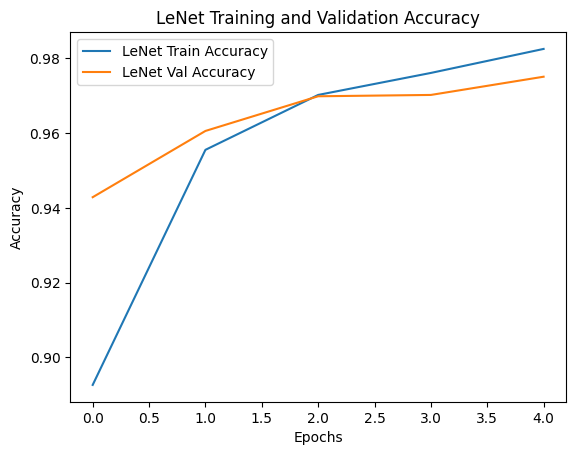

In [7]:
plt.plot(lenet_history.history['accuracy'], label='LeNet Train Accuracy')
plt.plot(lenet_history.history['val_accuracy'], label='LeNet Val Accuracy')
plt.title('LeNet Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **Plot the training and validation accuracy for AlexNet**


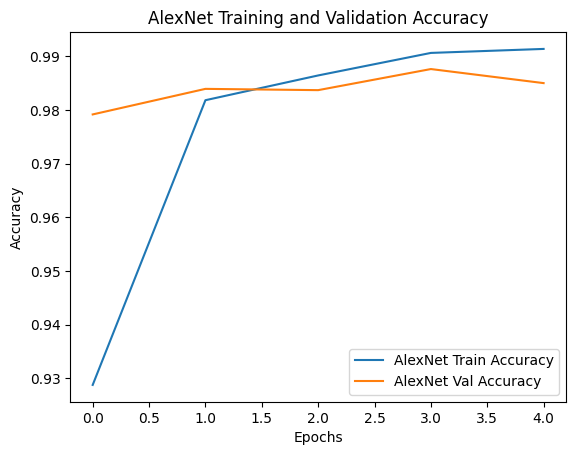

In [8]:
plt.plot(alexnet_history.history['accuracy'], label='AlexNet Train Accuracy')
plt.plot(alexnet_history.history['val_accuracy'], label='AlexNet Val Accuracy')
plt.title('AlexNet Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()